# PRA UAS

# 1.	Memilih satu dataset dari

 saya mengambil data diabetes dari dalam link di bawah ini

 https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Law&Types=Tabular


**a.	Jelaskan setiap fitur atau variable data tersebut**

In [8]:
from google.colab import files

# Upload file dari komputer lokal
uploaded = files.upload()

# Tampilkan nama file yang diupload
for filename in uploaded.keys():
    print(f'File "{filename}" berhasil diupload ({len(uploaded[filename])} bytes)')

Saving Data Diabetes.xlsx to Data Diabetes.xlsx
File "Data Diabetes.xlsx" berhasil diupload (31712 bytes)


In [16]:
# Baca file tanpa header
df = pd.read_excel('Data Diabetes.xlsx', header=None)

# Beri nama kolom manual
df.columns = ['A', 'B', 'C', 'D']  # Sesuaikan dengan jumlah kolom Anda

# Atau gunakan kolom berdasarkan posisi
kolom_c = df.iloc[:, 2]  # Kolom ketiga (indeks 2)

1. Kolom A: Tanggal (Date)
Deskripsi: Menunjukkan tanggal dan waktu pengukuran/pencatatan data

Format: Terdapat beberapa format tanggal yang digunakan:

Format MM-DD-YYYY (contoh: 04-21-1991)

Format YYYY-MM-DD (contoh: 1991-01-05)

Catatan: Data mencakup periode dari April 1991 hingga September 1991

2. Kolom B: Waktu (Time)
Deskripsi: Menunjukkan waktu pengukuran/pencatatan data

Format: HH:MM:SS (format waktu 24 jam)

Catatan: Waktu pengukuran bervariasi sepanjang hari, menunjukkan bahwa pengukuran dilakukan pada berbagai waktu

3. Kolom C: Kode Pengukuran (Measurement Code)
Deskripsi: Kode numerik yang kemungkinan besar menunjukkan jenis pengukuran atau parameter yang diukur

Nilai yang Muncul: 33, 34, 48, 58, 60, 62, 65

Interpretasi Kemungkinan:

33: Kemungkinan pengukuran gula darah (glukosa)

34: Kemungkinan pengukuran insulin

48: Kemungkinan pengukuran HbA1c (hemoglobin terglikasi)

58: Kemungkinan pengukuran gula darah puasa

60: Kemungkinan pengukuran gula darah 2 jam setelah makan

62: Kemungkinan pengukuran gula darah acak

65: Kemungkinan indikator kondisi khusus (nilainya selalu 0)

4. Kolom D: Nilai Pengukuran (Measurement Value)
Deskripsi: Nilai hasil pengukuran yang sesuai dengan kode di Kolom C

Rentang Nilai: Bervariasi tergantung kode pengukuran

Untuk kode 33 (glukosa): biasanya antara 2-13

Untuk kode 34 (insulin): biasanya antara 13-16

Untuk kode 48 (HbA1c): biasanya antara 35-340

Untuk kode 58 (gula darah puasa): biasanya antara 55-313

Untuk kode 60 (gula darah postprandial): biasanya antara 54-306

Untuk kode 62 (gula darah acak): biasanya antara 43-343

Untuk kode 65: selalu bernilai 0

**b.	Ekplorasi data tersebut (kualitas data: apakah ada outlier atau tidak, ada miisin value atau tidak, atau )**

1. Import Library yang Dibutuhkan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Muat Data dan Cek Struktur Dasar

In [10]:
# Ganti 'Data Diabetes.xlsx' dengan nama file Anda
df = pd.read_excel('Data Diabetes.xlsx')

# Cek 5 baris pertama
print(df.head())

# Cek info dataset
print("\nInformasi Dataset:")
print(df.info())

# Cek statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

   04-21-1991  09:09:00  58  100
0  04-21-1991  09:09:00  33    9
1  04-21-1991  09:09:00  34   13
2  04-21-1991  17:08:00  62  119
3  04-21-1991  17:08:00  33    7
4  04-21-1991  22:51:00  48  123

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   04-21-1991  942 non-null    object
 1   09:09:00    942 non-null    object
 2   58          942 non-null    int64 
 3   100         942 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 29.6+ KB
None

Statistik Deskriptif:
               58         100
count  942.000000  942.000000
mean    44.366242   67.375796
std     12.921435   85.656153
min     33.000000    0.000000
25%     33.000000    7.000000
50%     34.000000   14.500000
75%     58.000000  122.000000
max     65.000000  343.000000


3. Pengecekan Missing Values


Missing Values per Kolom:
04-21-1991    0
09:09:00      0
58            0
100           0
dtype: int64


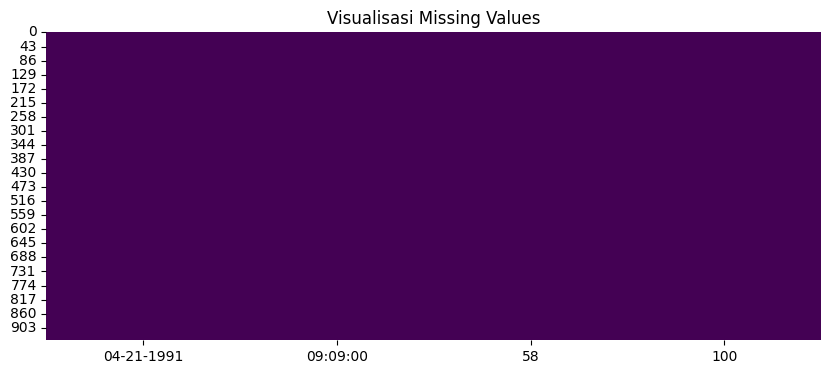

In [11]:
print("\nMissing Values per Kolom:")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

4. Pengecekan Duplikat

In [12]:
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


5. Analisis Outlier

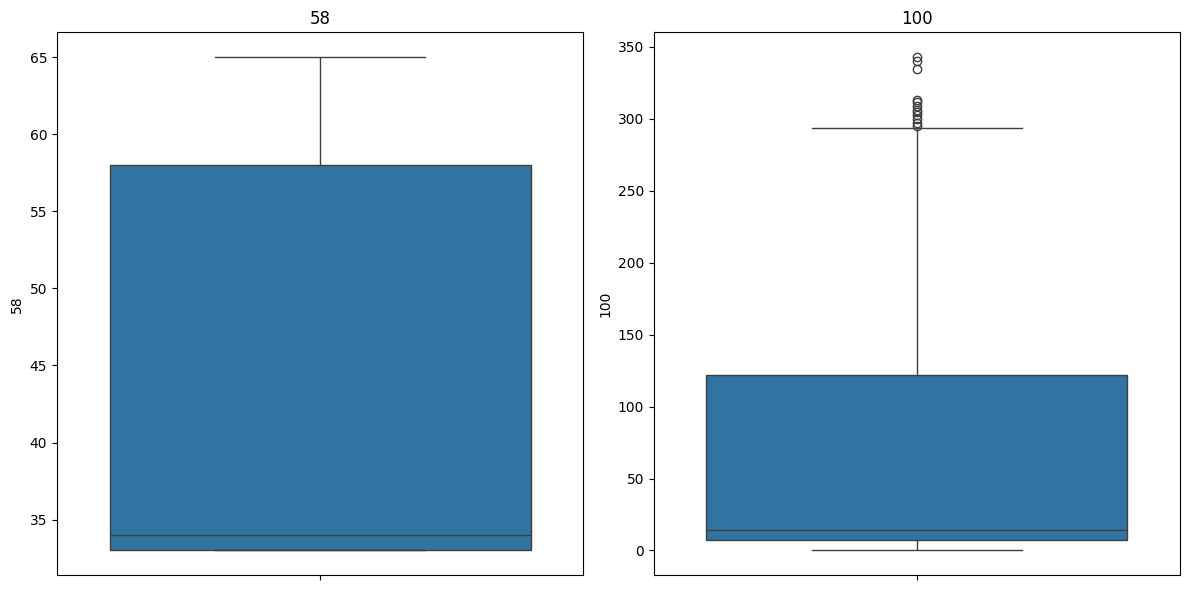


Outlier di kolom 58: 0

Outlier di kolom 100: 12


In [13]:
# Untuk kolom numerik (C dan D)
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Hitung outlier dengan IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutlier di kolom {col}: {len(outliers)}")

6. Analisis Kode Pengukuran (Kolom C)


Frekuensi Kode Pengukuran:
C
33    384
34    139
58    135
62    102
48     78
60     54
65     51
Name: count, dtype: int64


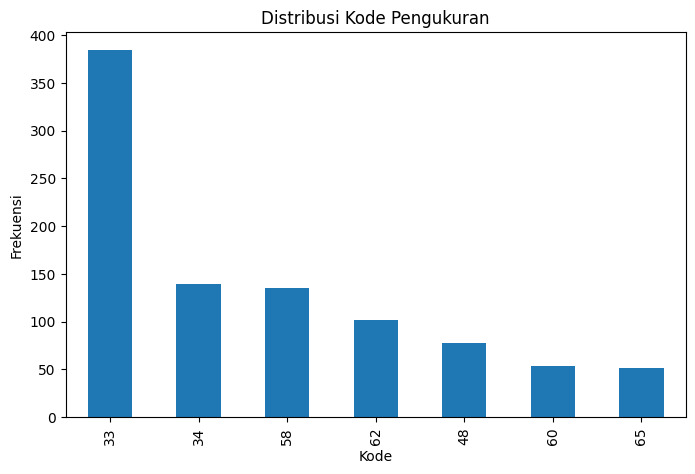

In [18]:
print("\nFrekuensi Kode Pengukuran:")
print(df['C'].value_counts())

plt.figure(figsize=(8,5))
df['C'].value_counts().plot(kind='bar')
plt.title('Distribusi Kode Pengukuran')
plt.xlabel('Kode')
plt.ylabel('Frekuensi')
plt.show()

7. Analisis Nilai Pengukuran per Kode

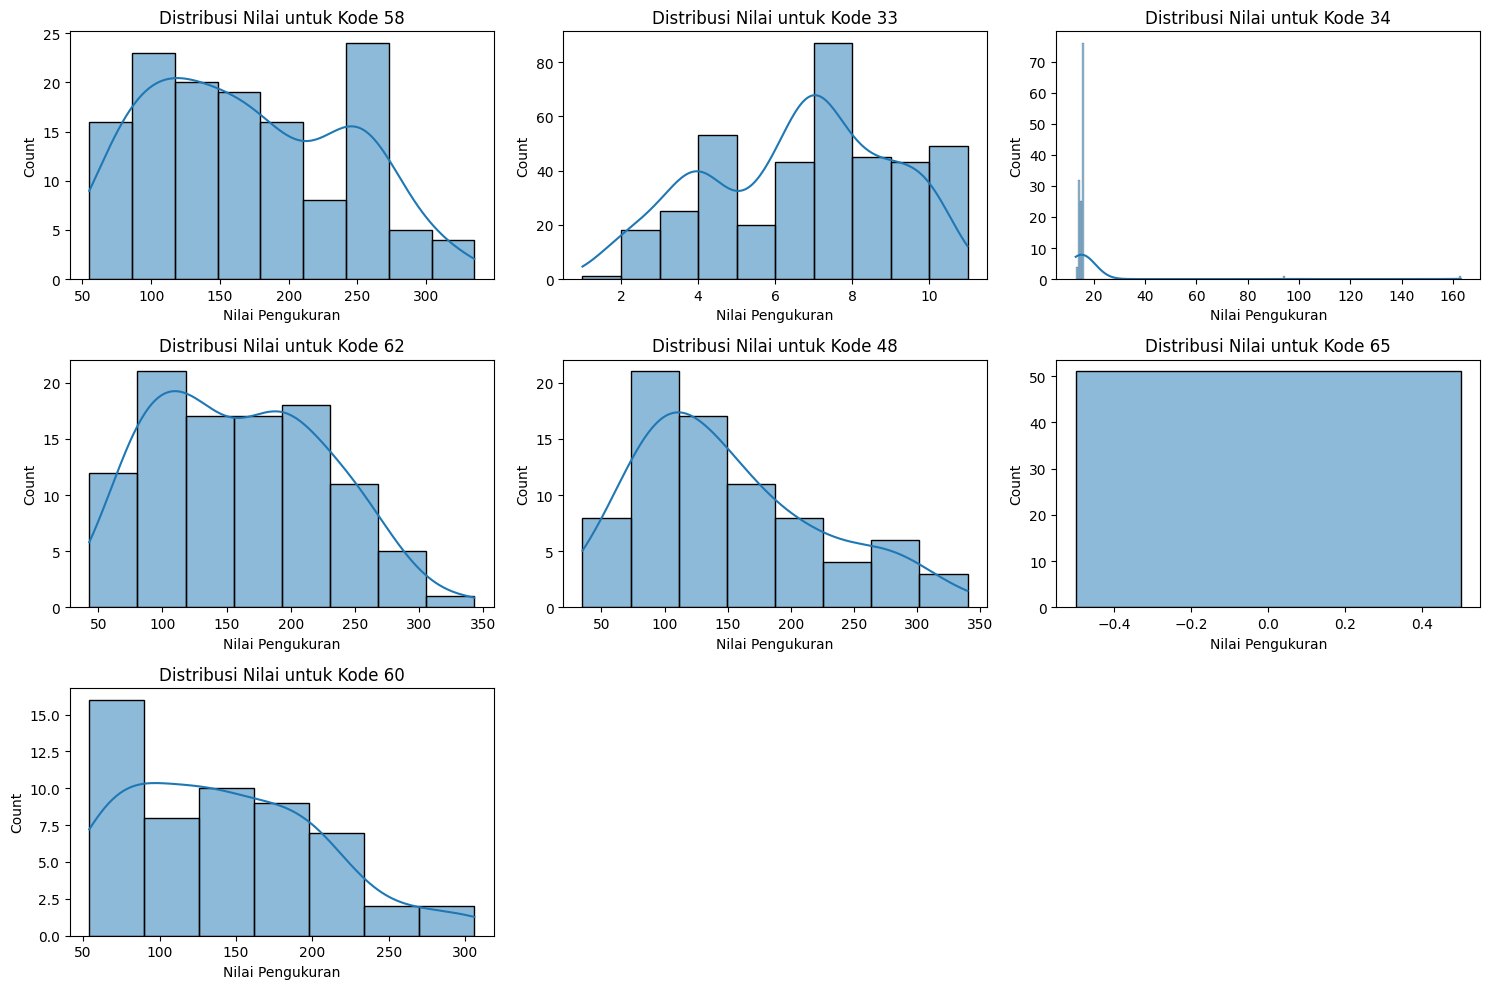

In [17]:
# Pisahkan data berdasarkan kode pengukuran
codes = df['C'].unique()

plt.figure(figsize=(15,10))
for i, code in enumerate(codes, 1):
    subset = df[df['C'] == code]
    plt.subplot(3, 3, i)
    sns.histplot(subset['D'], kde=True)
    plt.title(f'Distribusi Nilai untuk Kode {code}')
    plt.xlabel('Nilai Pengukuran')
plt.tight_layout()
plt.show()

8. Analisis Temporal

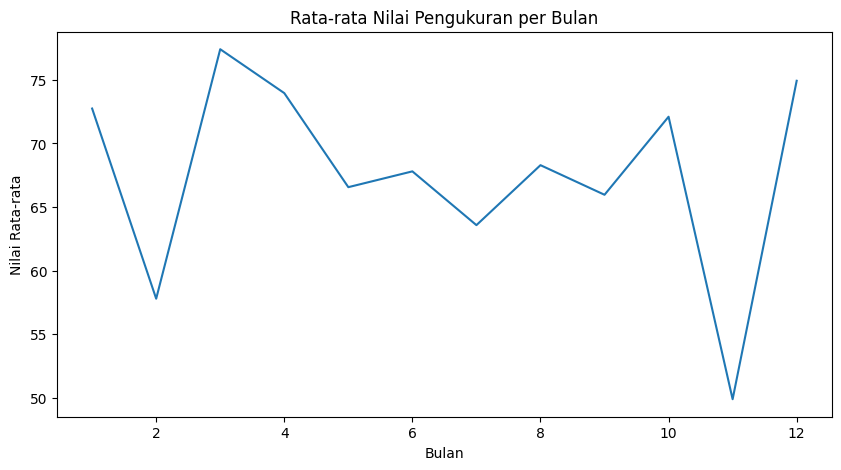

In [19]:
# Konversi kolom tanggal ke format datetime
df['A'] = pd.to_datetime(df['A'])

# Ekstrak bulan dan hari
df['month'] = df['A'].dt.month
df['day'] = df['A'].dt.day

# Analisis tren bulanan
plt.figure(figsize=(10,5))
df.groupby('month')['D'].mean().plot()
plt.title('Rata-rata Nilai Pengukuran per Bulan')
plt.ylabel('Nilai Rata-rata')
plt.xlabel('Bulan')
plt.show()

9. Korelasi Antar Variabel

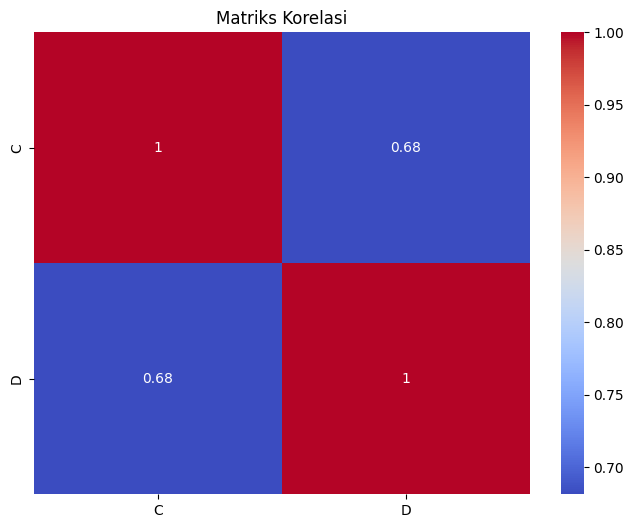

In [20]:
# Hitung korelasi
corr_matrix = df[['C', 'D']].corr()

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Hasil EDA yang Harus Diperhatikan:

Missing Values:

1. Cek apakah ada data yang hilang di kolom mana pun

2. Jika ada, tentukan strategi penanganan (imputasi atau penghapusan)

Outlier:

1. Identifikasi nilai ekstrem di setiap kode pengukuran

2. Tentukan apakah outlier adalah kesalahan atau data valid

Distribusi Data:

1. Analisis distribusi nilai untuk setiap kode pengukuran

2. Cek apakah distribusi normal atau perlu transformasi

Pola Temporal:

1. Identifikasi pola atau tren seiring waktu

2. Cek perbedaan pengukuran pagi/siang/malam

Kualitas Data:

1. Verifikasi konsistensi nilai untuk setiap kode pengukuran

2. Cek apakah ada nilai yang tidak masuk akal (misal: glukosa negatif)

**c.	Visualisasikan data tersebut**

1. Visualisasi Dasar Distribusi Data

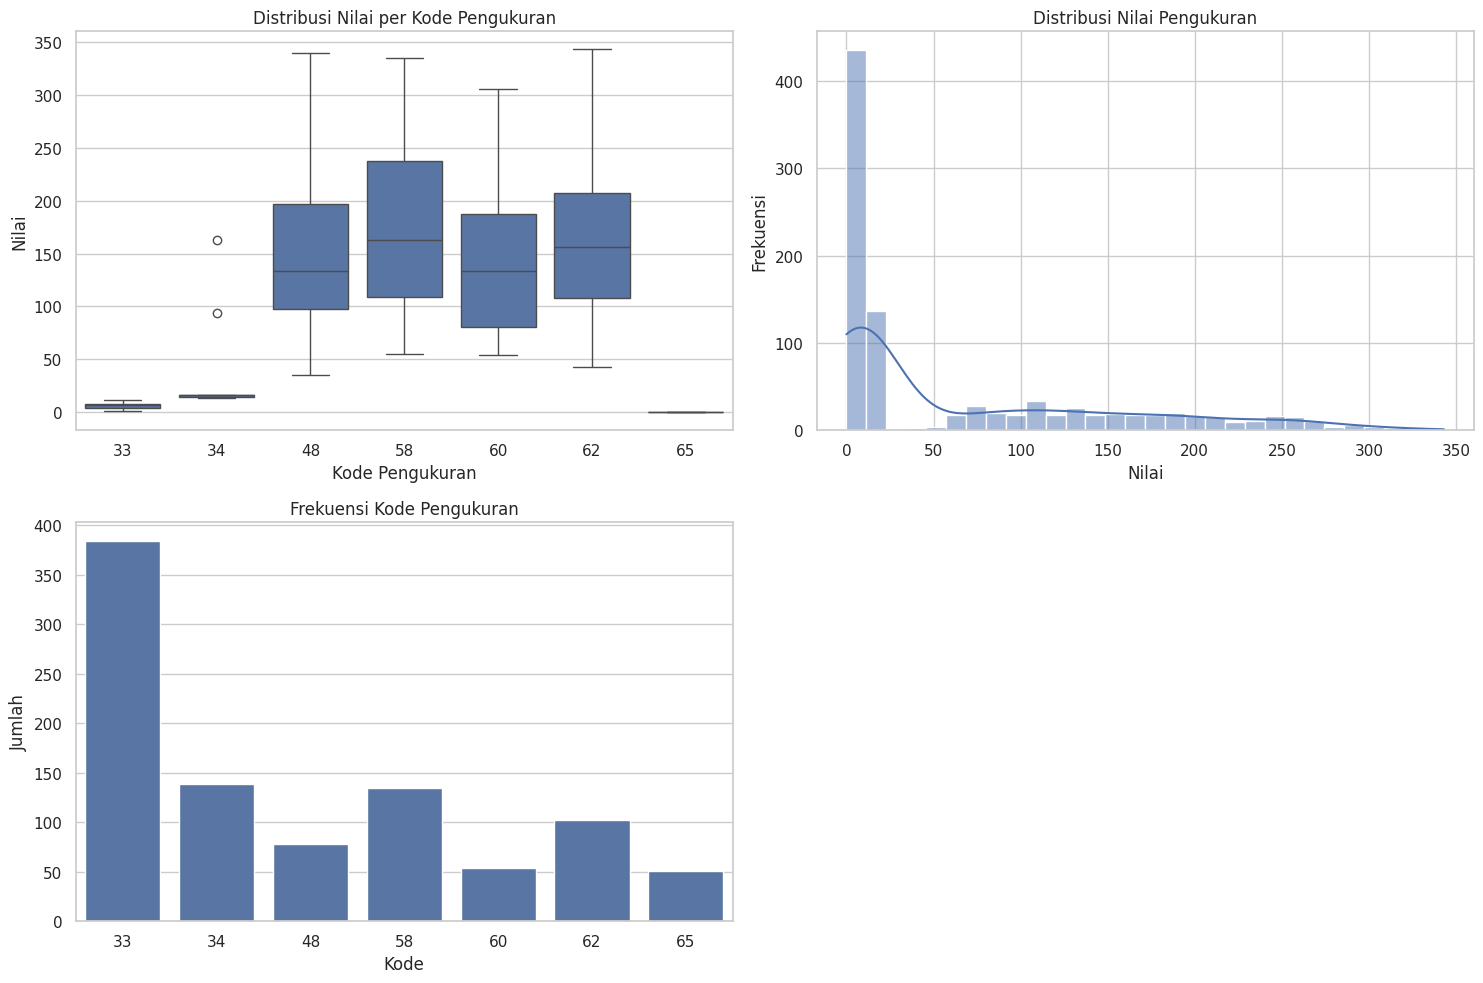

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Visualisasi distribusi nilai pengukuran per kode
plt.subplot(2, 2, 1)
sns.boxplot(x='C', y='D', data=df)
plt.title('Distribusi Nilai per Kode Pengukuran')
plt.xlabel('Kode Pengukuran')
plt.ylabel('Nilai')

# Histogram nilai pengukuran
plt.subplot(2, 2, 2)
sns.histplot(df['D'], bins=30, kde=True)
plt.title('Distribusi Nilai Pengukuran')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Count plot kode pengukuran
plt.subplot(2, 2, 3)
sns.countplot(x='C', data=df)
plt.title('Frekuensi Kode Pengukuran')
plt.xlabel('Kode')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

2. Visualisasi Lanjutan per Kode Pengukuran

/tmp/ipython-input-32-1545199460.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='A', y='D', data=subset, ci=None)
/tmp/ipython-input-32-1545199460.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='A', y='D', data=subset, ci=None)
/tmp/ipython-input-32-1545199460.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='A', y='D', data=subset, ci=None)
/tmp/ipython-input-32-1545199460.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='A', y='D', data=subset, ci=None)
/tmp/ipython-input-32-1545199460.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='A', y='D', data=subset, ci=None)
/tmp/ipython-input-32-1545199460.py:9: FutureWarning: 

The `ci` parameter is depreca

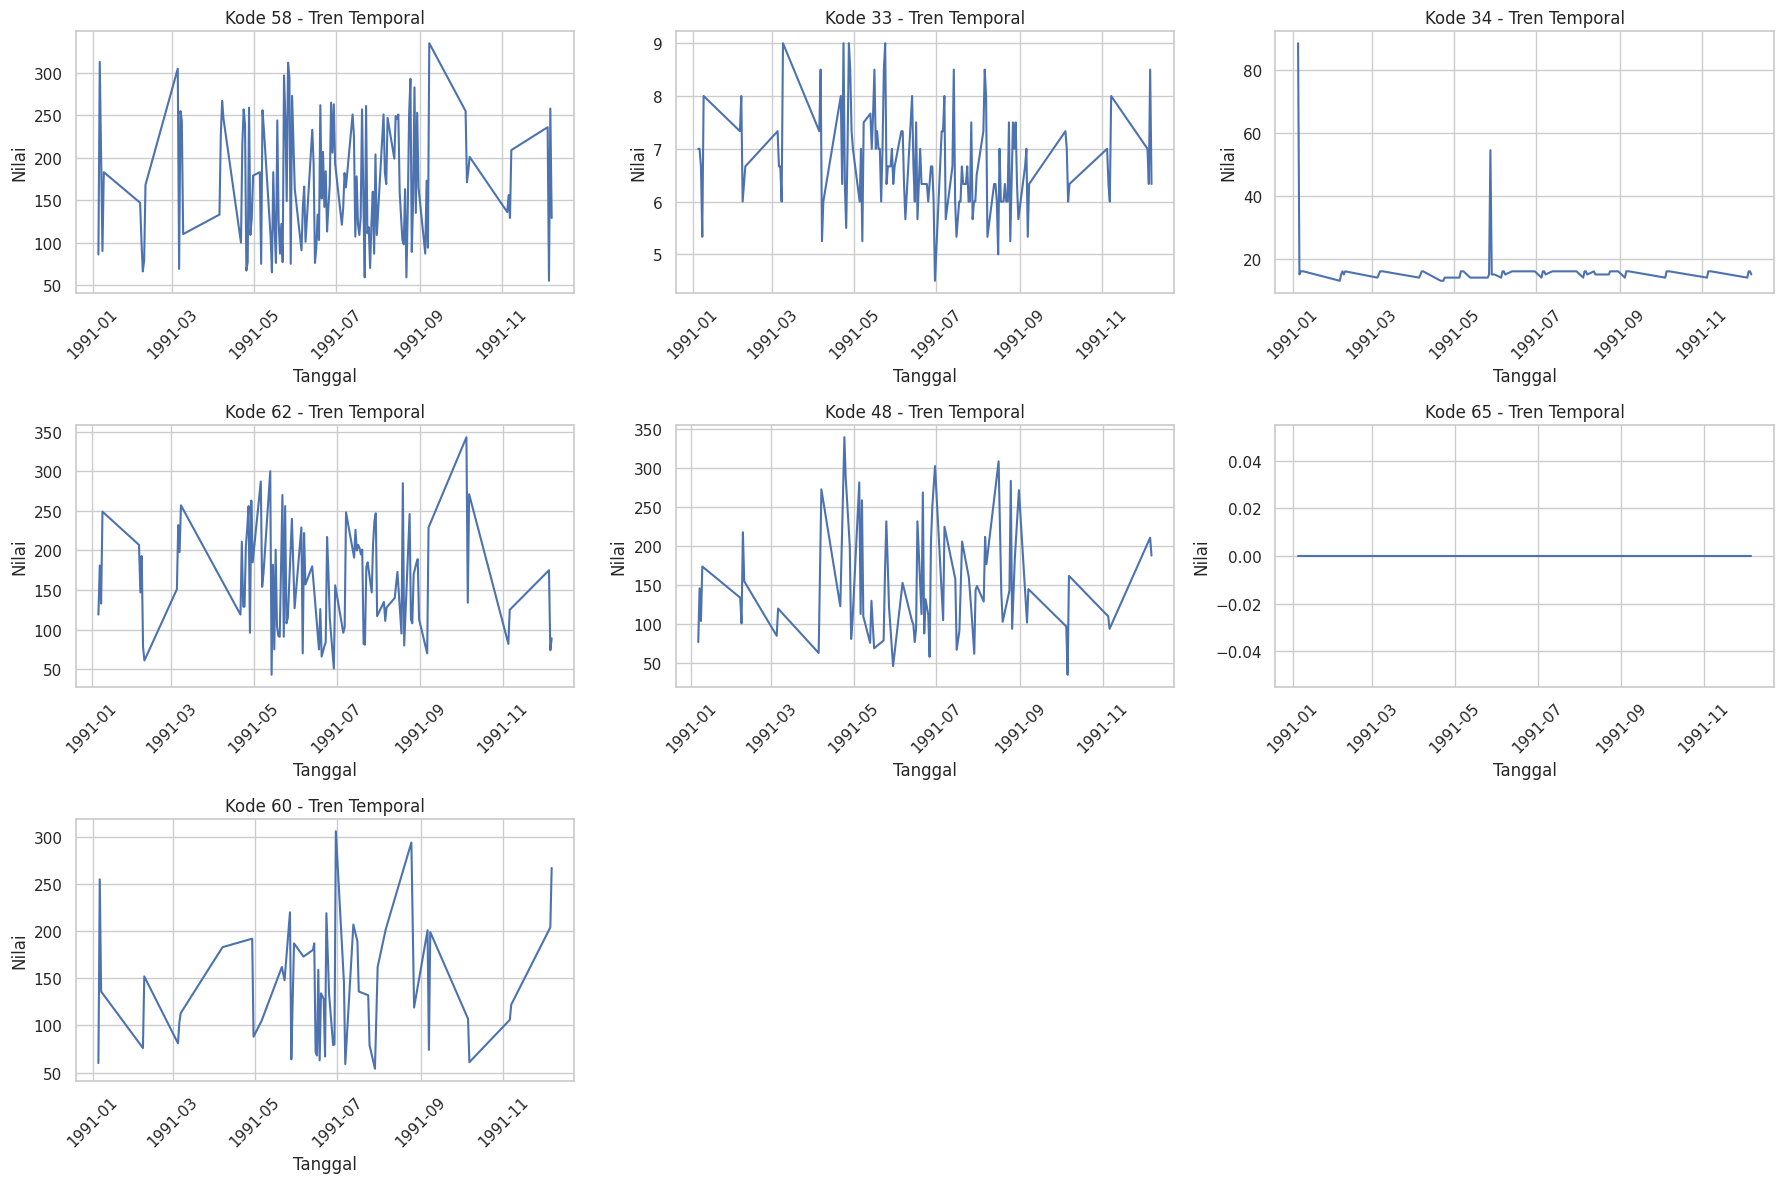

In [32]:
# Pisahkan plot per kode pengukuran
codes = df['C'].unique()

plt.figure(figsize=(18, 12))
for i, code in enumerate(codes, 1):
    subset = df[df['C'] == code]

    plt.subplot(3, 3, i)
    sns.lineplot(x='A', y='D', data=subset, ci=None)
    plt.title(f'Kode {code} - Tren Temporal')
    plt.xlabel('Tanggal')
    plt.ylabel('Nilai')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

3. Heatmap Korelasi dan Pair Plot

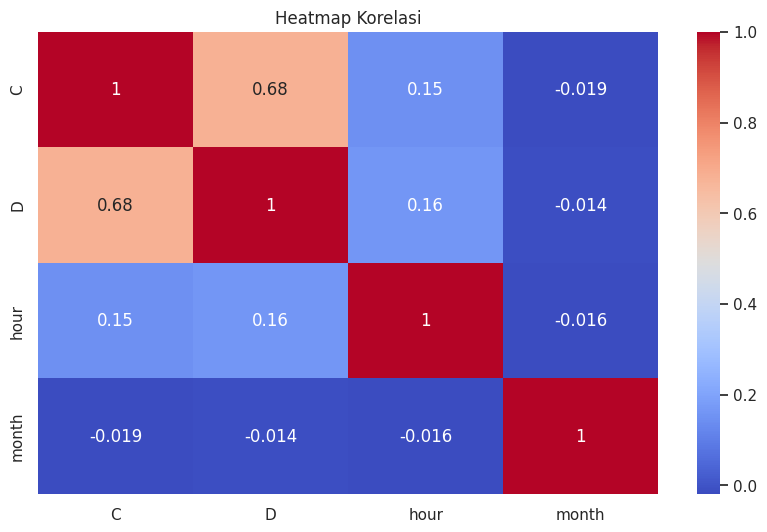

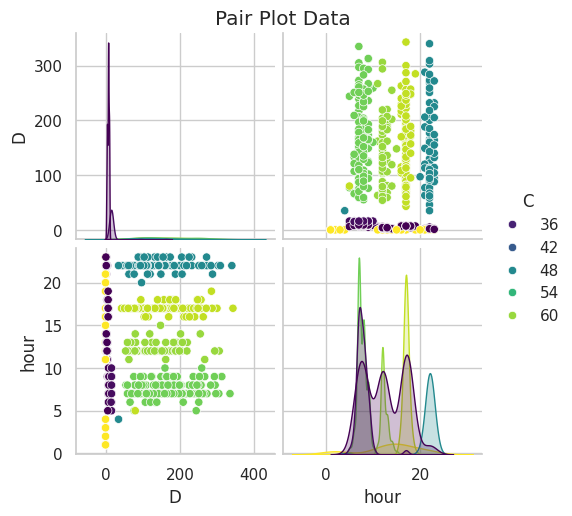

In [33]:
# Heatmap korelasi
plt.figure(figsize=(10, 6))
corr = df[['C', 'D', 'hour', 'month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# Pair plot untuk kode dan nilai
sns.pairplot(df[['C', 'D', 'hour']], hue='C', palette='viridis')
plt.suptitle('Pair Plot Data', y=1.02)
plt.show()

4. Visualisasi Interaktif (Menggunakan Plotly)

In [34]:
import plotly.express as px

# Plot interaktif temporal
fig = px.line(df, x='A', y='D', color='C',
              title='Trend Nilai Pengukuran Diabetes',
              labels={'A': 'Tanggal', 'D': 'Nilai Pengukuran', 'C': 'Kode'})
fig.show()

# Box plot interaktif per kode
fig = px.box(df, x='C', y='D', color='C',
             title='Distribusi Nilai per Kode Pengukuran')
fig.show()

Tips Visualisasi:

Untuk data temporal:

1. Gunakan line plot atau scatter plot untuk melihat tren

2. Perhatikan pola harian/bulanan

Untuk distribusi:

1. Gunakan boxplot atau histogram untuk melihat sebaran data

2. Identifikasi outlier

Untuk perbandingan:

1. Gunakan bar plot atau count plot untuk data kategorikal

2. Gunakan warna berbeda untuk kode pengukuran berbeda

Untuk interaksi:

1. Plotly memberikan visualisasi interaktif yang bisa di-zoom

2. Berguna untuk mengeksplorasi data lebih detail